In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.proportion as proportion

In [3]:
import copy
from sklearn.preprocessing import LabelEncoder

# 2.

In [5]:
df = pd.read_csv("insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3.

In [129]:
# a.Shape of the data

In [130]:
df.shape

(1338, 7)

In [131]:
# b.check datatypes of columns

In [132]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [133]:
# c.finding null values

In [134]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* No null values 

In [135]:
# d. 5 point summary of numerical attributes

In [136]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [137]:
# e. Distribution of age, bmi and charges

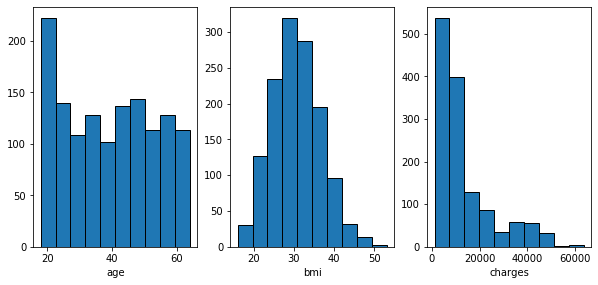

In [138]:
_=plt.figure(figsize=(10,15))
_=plt.subplot(3,3,1)
_=plt.hist(df.age, edgecolor = 'black')
_=plt.xlabel('age')
_=plt.subplot(3,3,2)
_=plt.hist(df.bmi, edgecolor = 'black')
_=plt.xlabel('bmi')
_=plt.subplot(3,3,3)
_=plt.hist(df.charges, edgecolor = 'black')
_=plt.xlabel('charges')

In [14]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [15]:
df['age'].skew()

0.05567251565299186

* age is uniformly distributed as obesrved from the histogram above and the value of skewness is very less

In [16]:
df['bmi'].skew()

0.2840471105987448

* bmi has some skew but appears to be almostuniformly distributed from the histogram above

In [17]:
df['charges'].skew()

1.5158796580240388

* distribution of charges is highly skewed as indicated by the histogram and the value of skewness

In [25]:
# g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

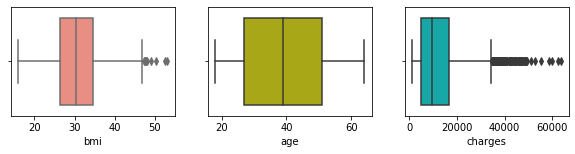

In [139]:
_=plt.figure(figsize=(10,2))
_=plt.subplot(1,3,1)
_=sns.boxplot(df.bmi,color='salmon')
_=plt.subplot(1,3,2)
_=sns.boxplot(df.age,color='y')
_=plt.subplot(1,3,3)
_=sns.boxplot(df.charges,color='c')

* 'age' has no outliers
* distribution of 'charges' is highly skewed and 'bmi' has some outliers

In [ ]:
# h.Distribution of categorical variables

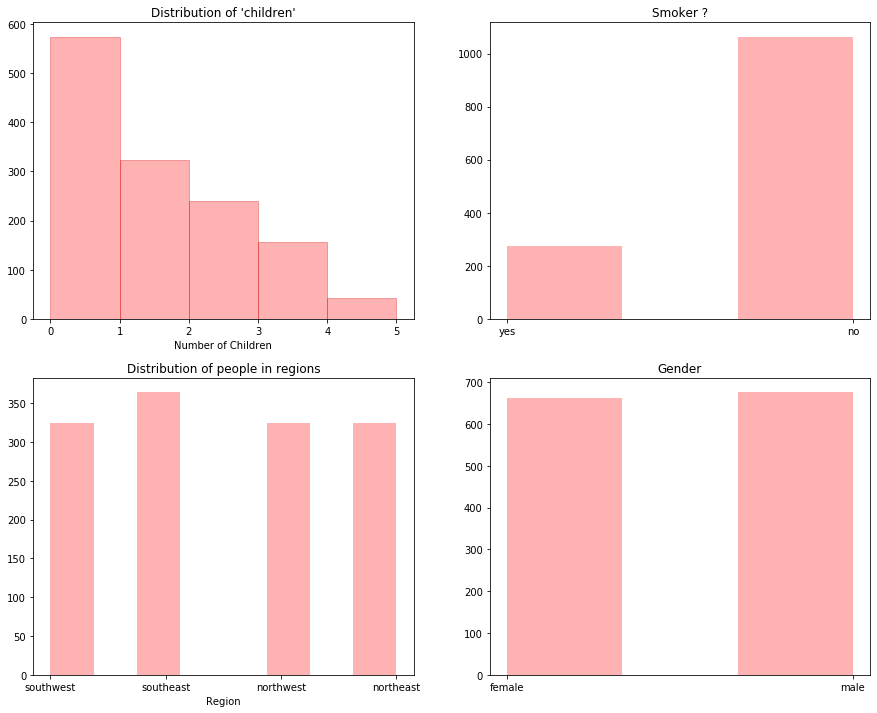

In [14]:
_=plt.figure(figsize=(15,12))

_=plt.subplot(2,2,1)
_=plt.hist(df['children'],bins=5,color='red',edgecolor=(0.8,0,0,0.02),alpha=0.3,align='mid')
_=plt.xlabel('Number of Children')
_=plt.title("Distribution of 'children'")

_=plt.subplot(2,2,2)
_=plt.hist(df['smoker'],bins=3,align='mid',color='red',alpha=0.3)
_=plt.title("Smoker ?")

_=plt.subplot(2,2,3)
_=plt.hist(df['region'],bins=8,color='red',alpha=0.3)
_=plt.xlabel('Region')
_=plt.title("Distribution of people in regions")

_=plt.subplot(2,2,4)
_=plt.hist(df['sex'],bins=3,color='red',alpha=0.3)
_=plt.title("Gender")


* Most people have upto 3 children, very few have 5.
* Most of the people are non-smokers.
* People are uniformly distributed across regions
* Equal distribution of males and females

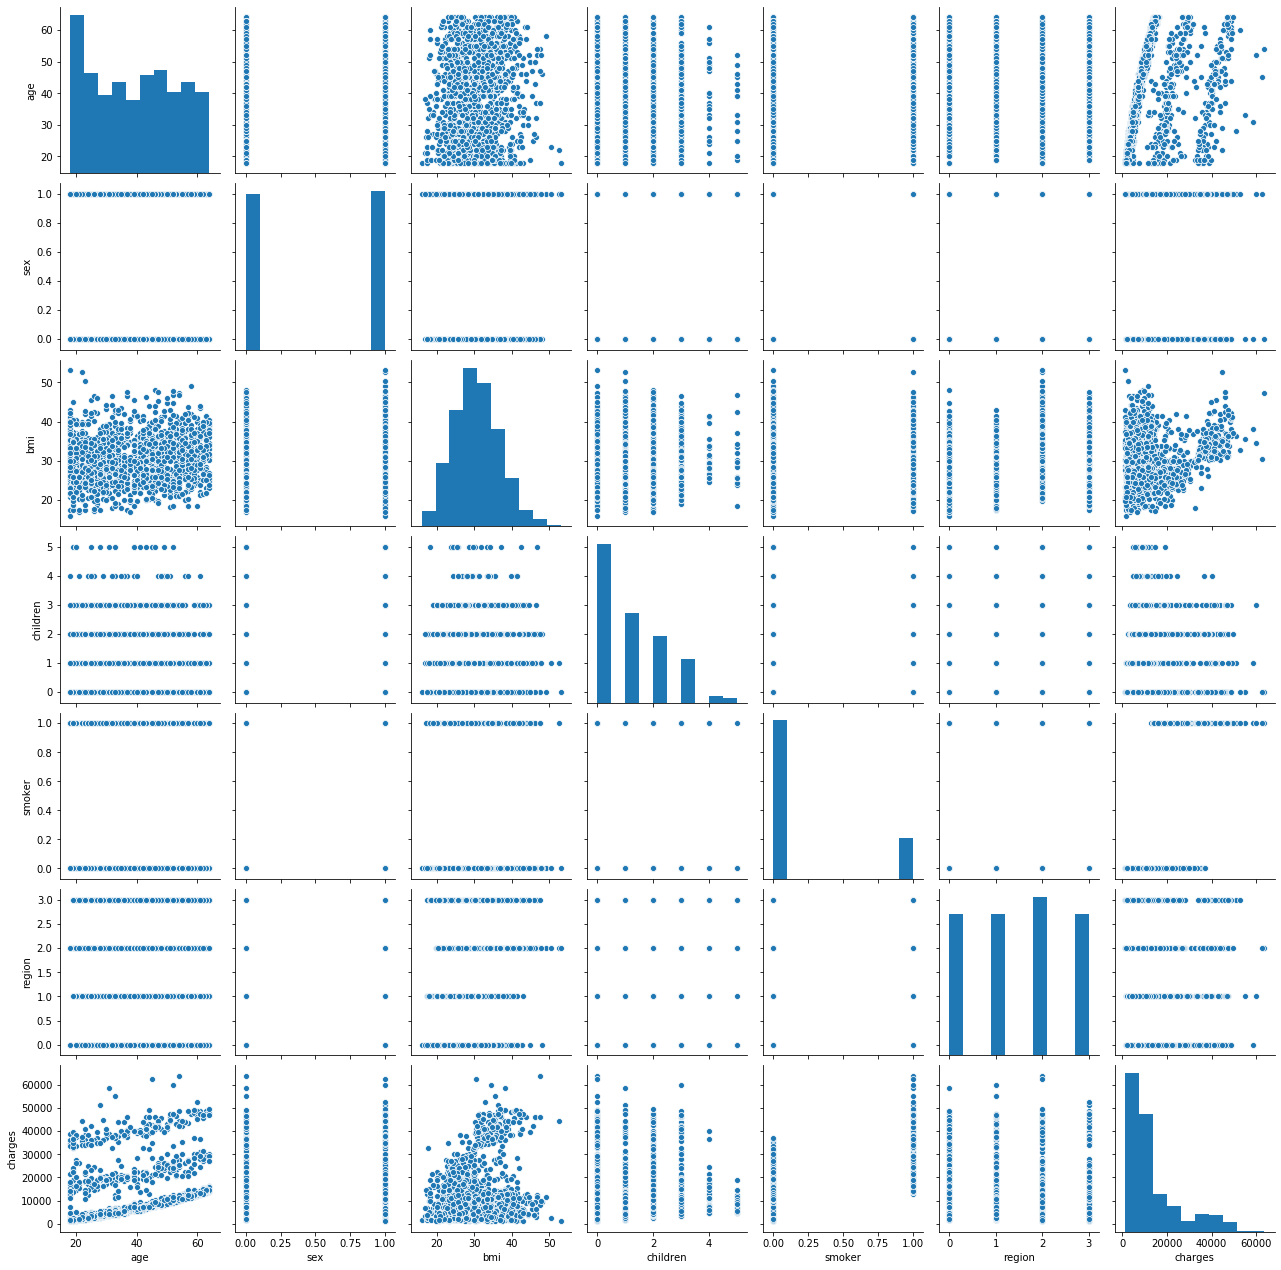

In [72]:
df_all = copy.deepcopy(df)
df_all.loc[:,['sex', 'smoker', 'region']] = df_all.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

_=sns.pairplot(df_all)

* charges seem to be clustered in different cost brackets; this might indicate influence of a hidden factor. Each bracket shows an increasing trend with age
* smokers tend to incur higher charges than non-smokers.
* BMI is almost equally distributed across regions.

# 4. a. Do charges of people who smoke differ significantly from the people who don't?

In [74]:
df2 = df.groupby('smoker').charges

In [75]:
df_Y = df[df.smoker=='yes'].charges.values

In [76]:
df_N = df[df.smoker=='no'].charges.values

In [99]:
# Visualizing group differences

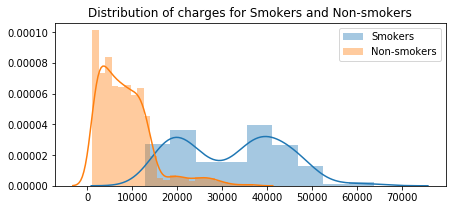

In [98]:
_=plt.figure(figsize=(7,3))
_=sns.distplot(df_Y,label='Smokers')
_=sns.distplot(df_N,label='Non-smokers')
_=plt.title('Distribution of charges for Smokers and Non-smokers')
_=plt.legend()

In [100]:
t_statistic, p_value  =  stats.ttest_ind(df_Y,df_N) # Independent samples t-test
if p_value <= 0.05:
    print("P Value =", p_value, "\nHence charges of people who smoke are significantly different from those who don't smoke") 

P Value = 8.271435842177219e-283 
Hence charges of people who smoke are significantly different from those who don't smoke


# b. Does bmi of males differ significantly from that of females?

In [102]:
df_m = df[df.sex=='male'].bmi.values

In [103]:
df_f = df[df.sex=='female'].bmi.values

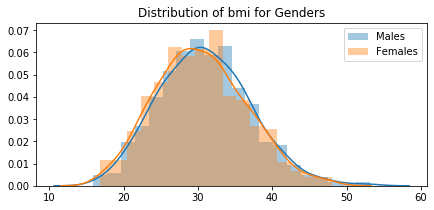

In [101]:
# Visualizing group differences
_=plt.figure(figsize=(7,3))
_=sns.distplot(df_m,label='Males')
_=sns.distplot(df_f,label='Females')
_=plt.title('Distribution of bmi for Genders')
_=plt.legend()

In [105]:
t_statistic, p_value = stats.ttest_ind(df_m, df_f)
print("t statistic =", t_statistic)
print('p =', p_value)

if p_value <= 0.05:
    
    print("P Value =", p_value, "\nHence bmi of men is significantly different from women") 
else:
    print("No significant difference, hence null hypothesis is true")

t statistic = 1.696752635752224
p = 0.08997637178984932
No significant difference, hence null hypothesis is true


# c. Is the proportion of smokers significantly different in different genders?

In [37]:
# import statsmodels.stats.proportion as proportion

In [151]:
crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table 
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [157]:
crosstab.loc[:,'yes']

sex
female    115
male      159
Name: yes, dtype: int64

In [158]:
# Chisquare test for proportions
chisq, pvalue,table = proportion.proportions_chisquare(crosstab.loc[:,'yes'],crosstab.loc[:,'no'])

In [163]:
#chi, pvalue, dof, expect  =  stats.chi2_contingency(crosstab)

In [164]:
print('Results:','chisq=%.3f, p = %.4f'%(chisq,pvalue))

if pvalue < 0.05:  # Setting our significance level at 5%
    print("Alternate hypothesis true, p < 0.05")
else:
    print("Null hypothesis true, p > 0.05")

Results: chisq=13.162, p = 0.0065
Alternate hypothesis true, p < 0.05


# d. Is the distribution of bmi across women with no children, one child and two children, the same ?

Null Hypothesis: "BMI is independent of number of children the women have"   
Alternate Hypothesis: "BMI is dependent on the the number of children the women have"   

In [110]:
c0 = females.bmi[females.children == 0]
c1 = females.bmi[females.children == 1]
c2 = females.bmi[females.children == 2]

In [111]:
# One way ANOVA to compare population means
f_stat, p_value = stats.f_oneway(c0,c1,c2)

In [122]:
print("F statistic = %.4f, p = %.3f" %(f_stat,p_value))
#print('Results:','chisq=%.3f, p = %.4f'%(chisq,pvalue))
if p_value < 0.05:  # ignificance level at 5%
    print("Alternate hypothesis is true as p < 0.05")
else:
    print("Null hypothesis is true as p > 0.05")

F statistic = 0.3345, p = 0.716
Null hypothesis is true as p > 0.05
